In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
from sklearn import preprocessing
import scipy.stats as stats


In [2]:
df = pd.read_csv('./ICPSR_35478/DS0001/35478-0001-Data.tsv',delimiter='\t',encoding='utf-8')
##print(list(df.columns.values)) #file header
##df.tail(35)

In [3]:
print(list(df.columns.values)) #file header

['YEAR', 'ID', 'INTID', 'FEEUSED', 'FEELEVEL', 'DATEINTV', 'LNGTHINV', 'INTAGE', 'INTETHN', 'MODE', 'INTSEX', 'INTYRS', 'CONSENT', 'BALLOT', 'VERSION', 'PHASE', 'SPANSELF', 'SPANINT', 'SPANENG', 'SAMPTYPE', 'WRKSTAT', 'HRS1', 'HRS2', 'EVWORK', 'WRKSLF', 'WRKGOVT', 'OCC10', 'INDUS10', 'MARITAL', 'DIVORCE', 'WIDOWED', 'SPWRKSTA', 'SPHRS1', 'SPHRS2', 'SPEVWORK', 'SPWRKSLF', 'SPOCC10', 'SPIND10', 'PAWRKSLF', 'PAOCC10', 'PAIND10', 'MAWRKSLF', 'MAOCC10', 'MAIND10', 'SIBS', 'CHILDS', 'AGE', 'AGEKDBRN', 'EDUC', 'PAEDUC', 'MAEDUC', 'SPEDUC', 'DEGREE', 'PADEG', 'MADEG', 'SPDEG', 'MAJOR1', 'MAJOR2', 'DIPGED', 'SPDIPGED', 'WHENHS', 'WHENCOL', 'SECTOR', 'EFTOTLT', 'BARATE', 'GRADTOUNDER', 'VOEDCOL', 'VOEDNME1', 'VOEDNCOL', 'VOEDNME2', 'SPSECTOR', 'SPEFTOTLT', 'SPBARATE', 'SPGRADTOUNDER', 'SEX', 'RACE', 'RES16', 'REG16', 'MOBILE16', 'FAMILY16', 'FAMDIF16', 'MAWRKGRW', 'INCOM16', 'BORN', 'PARBORN', 'GRANBORN', 'HOMPOP', 'BABIES', 'PRETEEN', 'TEENS', 'ADULTS', 'UNRELAT', 'EARNRS', 'INCOME', 'RINCOME',

In [4]:
## choosing the features with which all analysis and tasks will be done on
df_start  = pd.get_dummies(df[['YEAR', 'ID', 'SEX','RACE','WRKSTAT','DEGREE', 'VALMOD','VALRICH','SELFFRST', 'CLMTCHNG', 'HAPORNOT', 'RELPERSN', 'SPRTPRSN']])

In [5]:
## The shape of our data frame that we will start with
df_start.shape

(4820, 13)

each feature value is an integer that corresponds to a value that can be found through this [link](https://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/35478/datasets/1/sdaxml/variable?var=COMPUSE).  You will have to log in to view the informartion. 

In [6]:
## Creating a more descreptive catagorical features, great when trying to plot.


df_start['SEX_CAT'] = df_start['SEX'].replace([2,1],['Female','Male'])
df_start['RACE_CAT'] = df_start['RACE'].replace([1,2,3],['White','Black','Other'])
df_start['WRKSTAT_CAT'] = df_start['WRKSTAT'].replace([1,2,3,4,5,6,7,8,0,9],
                      ['Working full-time',
                       'Working part-time', 
                       'Temporary, not working', 
                       'Unemployed, laid off',
                       'Retired',
                       'School', 'Keeping house', 'Other',
                       'Inapplicable', 'No Answer'])
df_start['DEGREE_CAT'] = df_start['DEGREE'].replace([0,1,2,3,4],
                      ['Less than High school',
                       'High School', 
                       'Junior College', 
                       'Bachelor',
                       'Graduate'] )
## creating Non Availble data in which later we could impute. 
## 0, 8 , 9 are represnting different types of non availble data

df_start['RELPERSN'].replace([0,8,9], None, inplace = True)

df_start['SPRTPRSN'].replace([0,8,9], None, inplace = True)

df_start['VALRICH'].replace([0,8,9], None, inplace = True)
df_start['VALMOD'].replace([0,8,9], None, inplace = True)
df_start['SELFFRST'].replace([0,8,9], None, inplace = True)

In [7]:
df_start.head()

,YEAR,ID,SEX,RACE,WRKSTAT,DEGREE,VALMOD,VALRICH,SELFFRST,CLMTCHNG,HAPORNOT,RELPERSN,SPRTPRSN,SEX_CAT,RACE_CAT,WRKSTAT_CAT,DEGREE_CAT
0,2012,1,1,1,2,3,0,0,3,0,0,3,2,Male,White,Working part-time,Bachelor
1,2012,2,1,1,2,1,0,0,1,0,0,3,3,Male,White,Working part-time,High School
2,2012,3,1,3,1,1,0,0,3,0,0,3,3,Male,Other,Working full-time,High School
3,2012,4,2,1,8,1,0,0,3,0,0,4,3,Female,White,Other,High School
4,2012,5,2,2,5,3,0,0,3,0,0,2,2,Female,Black,Retired,Bachelor


In [31]:
## For some of the features we have a scale we want to reverse the order to make numbers reflect the level 
## of the feature with high meaning high level of that feature 
df_start['relPer'] = np.log(max(df_start['RELPERSN']) - df_start['RELPERSN'] +1 )

## We will end up with a set of values from 0 to 3 that indicates the level of how religious the person R is.

## we will conduct the same technique on SPRTPRSN

## also I will use different techiniques to normalize the data, using the Log or square root. 


## to use log we need to add 1 to our values to avoid taking the log of 0 


df_start['sprPer'] = np.log(max(df_start['SPRTPRSN']) - df_start['SPRTPRSN'] + 1)

df_start['vrich'] = np.log(max(df_start['VALRICH']) - df_start['VALRICH'] +1 )
df_start['vmod'] = np.sqrt(max(df_start['VALMOD']) - df_start['VALMOD'])

df_start['selfish'] = np.log((max(df_start['SELFFRST']) - df_start['SELFFRST']) + 1)

In [32]:
df_start.head()

print(df_start.describe())
print(df_start.info())

         YEAR            ID          SEX         RACE      WRKSTAT  \
count  4820.0   4820.000000  4820.000000  4820.000000  4820.000000   
mean   2012.0   6195.448340     1.557676     1.314938     3.030913   
std       0.0   4440.116843     0.496714     0.617233     2.327618   
min    2012.0      1.000000     1.000000     1.000000     1.000000   
25%    2012.0   1205.750000     1.000000     1.000000     1.000000   
50%    2012.0   8436.500000     2.000000     1.000000     2.000000   
75%    2012.0  10346.250000     2.000000     1.000000     5.000000   
max    2012.0  11551.000000     2.000000     3.000000     9.000000   

            DEGREE       VALMOD      VALRICH     SELFFRST     CLMTCHNG  \
count  4820.000000  4820.000000  4820.000000  4820.000000  4820.000000   
mean      1.659544     2.248340     2.449793     2.473444     0.470539   
std       1.230308     2.214468     2.157757     0.878557     1.060997   
min       0.000000     0.000000     0.000000     1.000000     0.000000   

In [33]:
dfPlot =  df_start.loc[:, 'relPer':'selfish'].dropna()
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(dfPlot.shape)),
    columns=dfPlot.columns)
dfPlot = dfPlot.add(jitter)

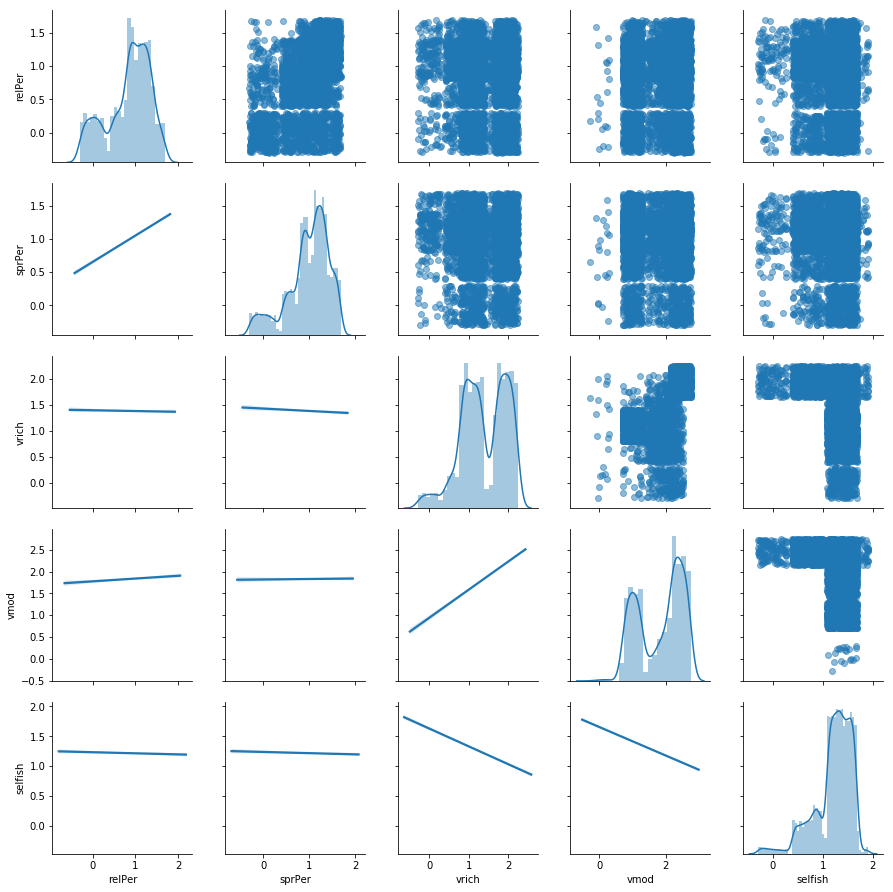

In [34]:
g = sns.PairGrid(dfPlot.dropna(), diag_sharey=False)


# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.distplot)
plt.show()

           relPer    sprPer     vrich      vmod   selfish
relPer   1.000000  0.518769 -0.000427  0.046369 -0.031503
sprPer   0.518769  1.000000 -0.019858  0.017031 -0.043371
vrich   -0.000427 -0.019858  1.000000  0.762853 -0.597568
vmod     0.046369  0.017031  0.762853  1.000000 -0.536215
selfish -0.031503 -0.043371 -0.597568 -0.536215  1.000000


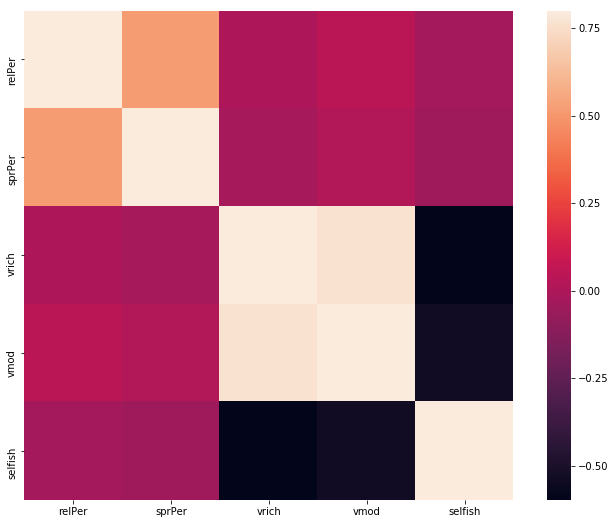

In [12]:
corrmat = dfPlot.corr()
print(corrmat)
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

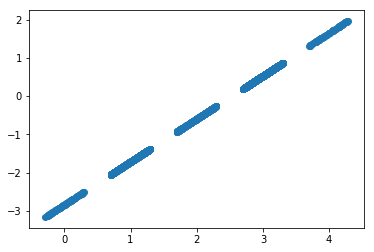

In [13]:
names = dfPlot.columns
df_scaled = pd.DataFrame(preprocessing.scale(dfPlot), columns=names)

plt.scatter(dfPlot['selfish'], df_scaled['selfish'])
plt.show()

/Users/Badrshuaib/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


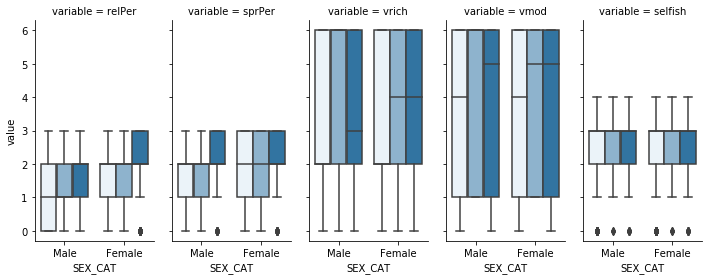

In [15]:
## melt the data into shape
df_long = df_start
df_long = pd.melt(df_long, id_vars=['SEX_CAT', 'RACE_CAT'], value_vars=df_long.loc[:,'relPer':'selfish'])


## Plot a boxplot with three different varaibles.
g = sns.FacetGrid(df_long, col="variable",  height=4, aspect=.5)
g = g.map(sns.boxplot, "SEX_CAT", "value" ,hue =df_long['RACE_CAT'])
plt.show()


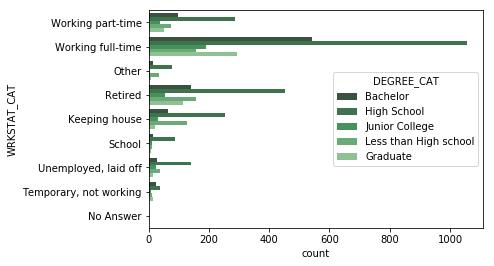

In [16]:
sns.countplot(y="WRKSTAT_CAT", hue="DEGREE_CAT", data=df_start, palette="Greens_d")
plt.show()


So far I have created some features to be able to work n plotting, I have created 8 new features so far. The continuos features required me to reorder them with values more indicative of the level of each feature. the categorical features were coded in numbers and I created features with their descriptive names. 

In [18]:
for col in df_start.loc[:,'relPer':'selfish'].columns:
    print(col)
    print(stats.ttest_ind(
        df_start[df_start['SEX_CAT'] == 'Male'][col].dropna(),
        df_start[df_start['SEX_CAT'] == 'Female'][col].dropna()
    ))

relPer
Ttest_indResult(statistic=-8.8082923879404511, pvalue=1.7445867876203412e-18)
sprPer
Ttest_indResult(statistic=-11.891655626944903, pvalue=3.6714454283834023e-32)
vrich
Ttest_indResult(statistic=1.3839257175896933, pvalue=0.16644530561354565)
vmod
Ttest_indResult(statistic=0.17627586019774849, pvalue=0.86008463444250804)
selfish
Ttest_indResult(statistic=2.6220158933051065, pvalue=0.0087686337808565492)


In [19]:
## Create a feature with education levels seperated into two major ones, College and above and no college
df_start['highEdu'] = np.where(df_start['DEGREE']>= 3, 1, 0)

In [20]:
df_start['highEdu_CAT'] =  df_start['highEdu'].replace([1,0],['High Education','No High Education'])

In [21]:
df_start.head()

,YEAR,ID,SEX,RACE,WRKSTAT,DEGREE,VALMOD,VALRICH,SELFFRST,CLMTCHNG,...,RACE_CAT,WRKSTAT_CAT,DEGREE_CAT,relPer,sprPer,vrich,vmod,selfish,highEdu,highEdu_CAT
0,2012,1,1,1,2,3,0,0,3,0,...,White,Working part-time,Bachelor,1,2,6,6,2,1,High Education
1,2012,2,1,1,2,1,0,0,1,0,...,White,Working part-time,High School,1,1,6,6,4,0,No High Education
2,2012,3,1,3,1,1,0,0,3,0,...,Other,Working full-time,High School,1,1,6,6,2,0,No High Education
3,2012,4,2,1,8,1,0,0,3,0,...,White,Other,High School,0,1,6,6,2,0,No High Education
4,2012,5,2,2,5,3,0,0,3,0,...,Black,Retired,Bachelor,2,2,6,6,2,1,High Education


In [35]:
for col in df_start.loc[:,'relPer':'selfish'].columns:
    print(col)
    print(stats.ttest_ind(
        df_start[df_start['highEdu'] == 1][col].dropna(),
        df_start[df_start['highEdu'] == 0][col].dropna()
    ))

relPer
Ttest_indResult(statistic=-5.5968828535706754, pvalue=2.3032504833087942e-08)
sprPer
Ttest_indResult(statistic=2.0574733214623468, pvalue=0.039694414791906669)
vrich
Ttest_indResult(statistic=-1.4934853666020687, pvalue=0.1353756634720337)
vmod
Ttest_indResult(statistic=-2.4981620297959255, pvalue=0.012516984187704097)
selfish
Ttest_indResult(statistic=-3.2088711764950766, pvalue=0.0013413058309057792)


In [36]:
## I will create an interaction between two features, I assume that having higher education has an effect 
## on a person alongside being religious when it comes to reporting putting oneself ahead of others


df_start['educ_relegious'] = df_start['relPer'] * df_start['highEdu']

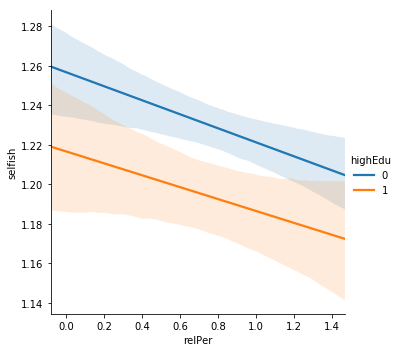

In [37]:
sns.lmplot(
    x='relPer',
    y='selfish',
    hue='highEdu',
    data=df_start,
    scatter=False
)
plt.show()